<a href="https://colab.research.google.com/github/Bharathkrishnamurthy/21Day_21_ML-_project/blob/main/future_stores_with_ai_DAY6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 6: Time Series Analysis & Forecasting 📈

**Project Objective:** To build a time series model to forecast the number of airline passengers for future months. This project provides a comprehensive, step-by-step guide to time series analysis, from data decomposition and stationarity testing to building and evaluating ARIMA and SARIMA models.

### Core Concepts:
1.  **Time Series Fundamentals:** Understanding the components of a time series (Trend, Seasonality, Residuals).
2.  **Stationarity:** Learning what stationarity is, why it's crucial for many models, and how to test for it (Augmented Dickey-Fuller test).
3.  **Data Transformation:** Applying techniques like differencing and log transforms to make a series stationary.
4.  **Model Identification:** Using Autocorrelation (ACF) and Partial Autocorrelation (PACF) plots to determine model parameters.
5.  **ARIMA Modeling:** Building a baseline ARIMA model for forecasting.
6.  **SARIMA Modeling:** Extending ARIMA to build a powerful SARIMA model that explicitly handles seasonality.
7.  **Forecasting & Evaluation:** Making predictions and evaluating model performance.

### Step 1: Setup - Importing Libraries and Loading Data

In [2]:
!pip install statsmodels


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


# Set plot style and size
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 4.62 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [5]:
df=pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/airline_passenger_timeseries.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### Step 2: Exploratory Data Analysis & Decomposition

In [6]:
print("Data information...............")
df.info()

Data information...............
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
print('Detailed description')
df.describe()

Detailed description


,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [8]:
print("Null values")
df.isna().sum()

Null values


,0
Month,0
Passengers,0


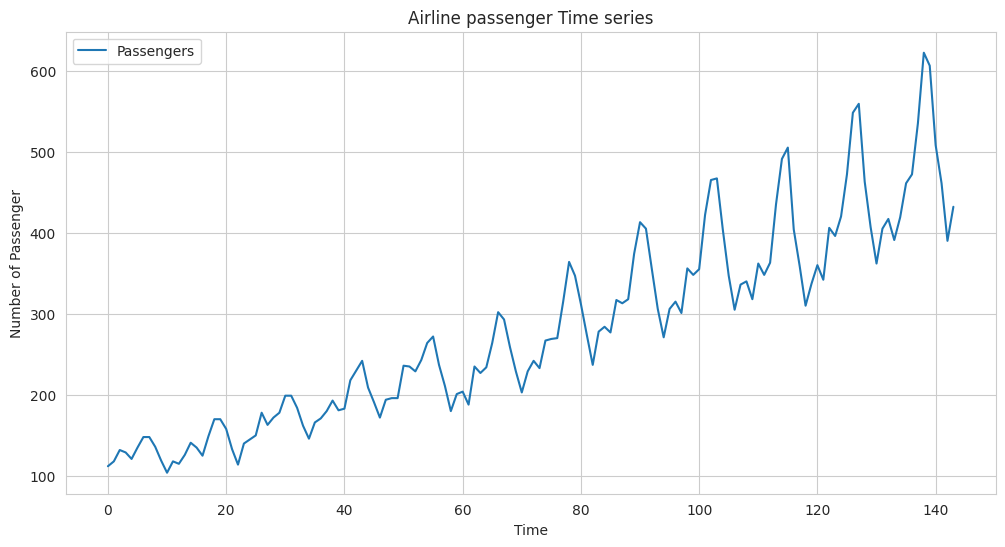

In [9]:
df.plot()
plt.title('Airline passenger Time series')
plt.xlabel('Time')
plt.ylabel('Number of Passenger')
plt.show()

***Upward Trend***: Overall, the number of airline passengers is increasing over time. This is evident from the general upward slope of the line.

***Seasonality***: There's a clear pattern that repeats at regular intervals, likely corresponding to the months of the year. You can see peaks and troughs that occur around the same time each year. This suggests that certain months consistently have more or fewer passengers than others.


***Variability***: The fluctuations around the trend er
and seasonal patterns seem to be increasing over time. This means the difference between peak and off-peak passenger numbers is becoming larger as the years go by.

In [10]:
# convert month to date time
df['Month']=pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)
df.head()


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


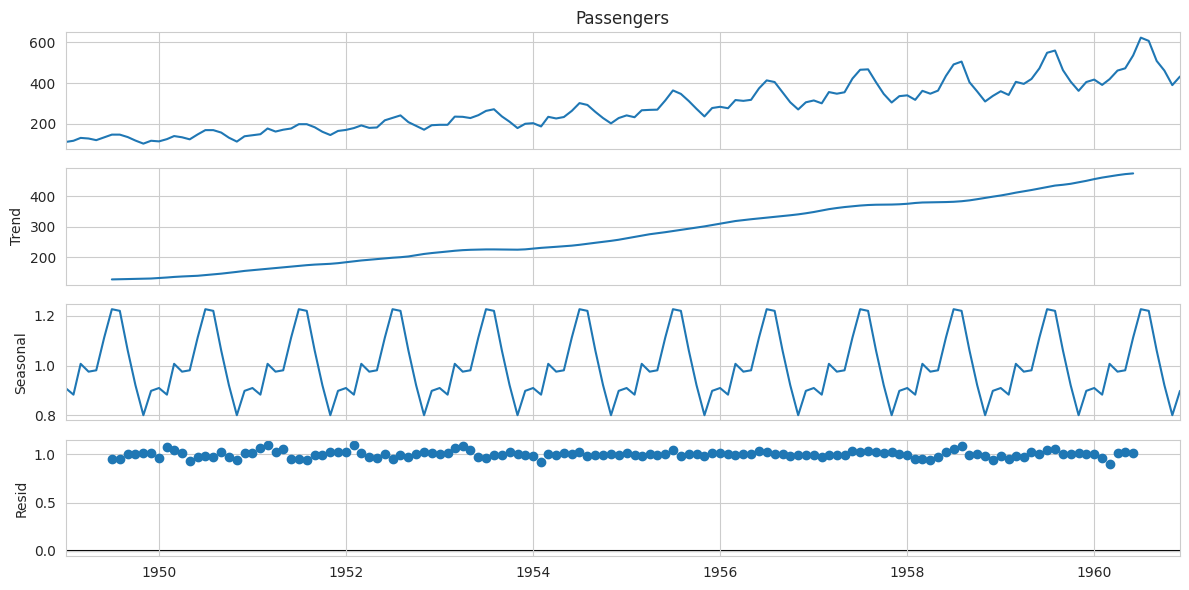

In [11]:
# decompose its timeseries to visualise indivisualy
decompose_ts=sm.tsa.seasonal_decompose(df['Passengers'],model='multiplicative')
decompose_ts.plot()
plt.show()

### Step 3: Stationarity Testing
Before we can build a model like ARIMA, the time series needs to be **stationary**.

Theoretical Concept: Stationarity
A time series is said to be stationary if its statistical properties—specifically the mean, variance, and autocorrelation—are all constant over time.

Why is it important? Stationary series are easier to model and forecast. If a series is stationary, its past behavior is a good predictor of its future behavior. Our passenger data is clearly non-stationary because its mean (the trend is increasing) and variance (the seasonal swings are growing) are not constant.
How to test for it?

Visual Inspection: Look at the plot. Is there a clear trend or seasonality?
Statistical Tests: The Augmented Dickey-Fuller (ADF) Test is a common statistical test.
Null Hypothesis ($H_0$): The series is non-stationary.
Alternative Hypothesis ($H_1$): The series is stationary.
We want to reject the null hypothesis. To do this, we need the p-value from the test to be less than a significance level (e.g., 0.05).

In [12]:
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(df['Passengers'])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [13]:
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

### Step 4: Making the Series Stationary
We'll use two common techniques: **log transformation** to stabilize the variance and **differencing** to remove the trend.

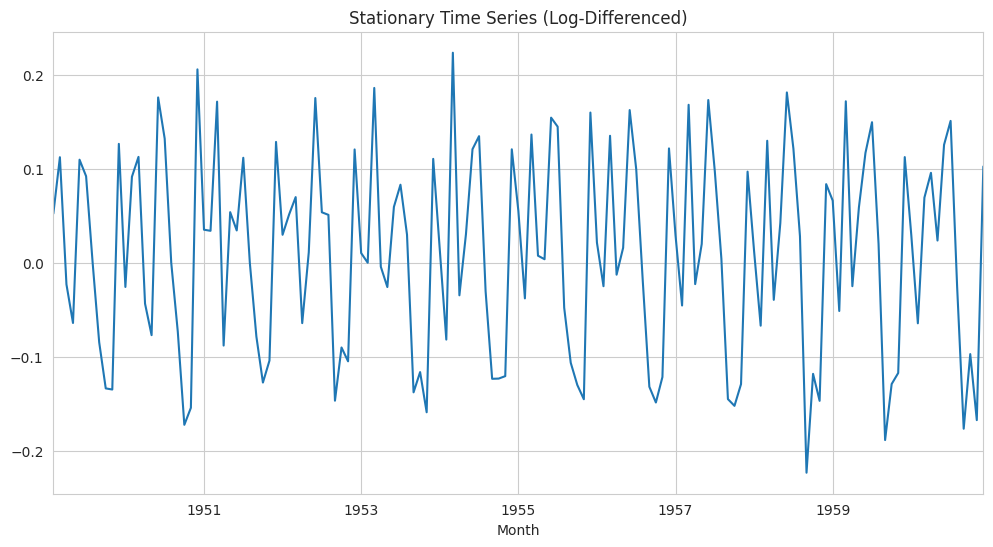

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [14]:
# 1. Apply the log transformation
df_log = np.log(df['Passengers'])

# 2. Apply differencing to remove the trend
df_diff = df_log.diff().dropna()

# Plot the stationary series
df_diff.plot()
plt.title('Stationary Time Series (Log-Differenced)')
plt.show()

# Retest for stationarity
test_stationarity(df_diff)

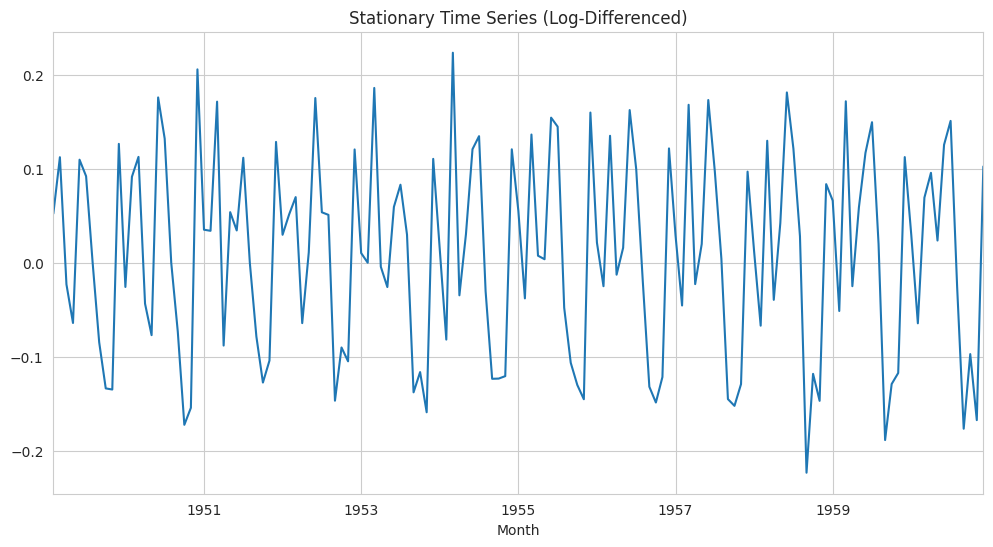

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [15]:
# 1. Apply the log transformation
df_log = np.log(df['Passengers'])

# 2. Apply differencing to remove the trend
df_diff = df_log.diff().dropna()

# Plot the stationary series
df_diff.plot()
plt.title('Stationary Time Series (Log-Differenced)')
plt.show()

# Retest for stationarity
test_stationarity(df_diff)

### Step 4 (Continued): Making the Series Stationary with Seasonal Differencing
Since the p-value from the last test was still above 0.05, and our time series exhibits strong seasonality, we will apply seasonal differencing to the log-transformed data. This technique helps remove the seasonal component and can lead to a more stationary series. We'll use a seasonal period of 12 since the data is monthly.

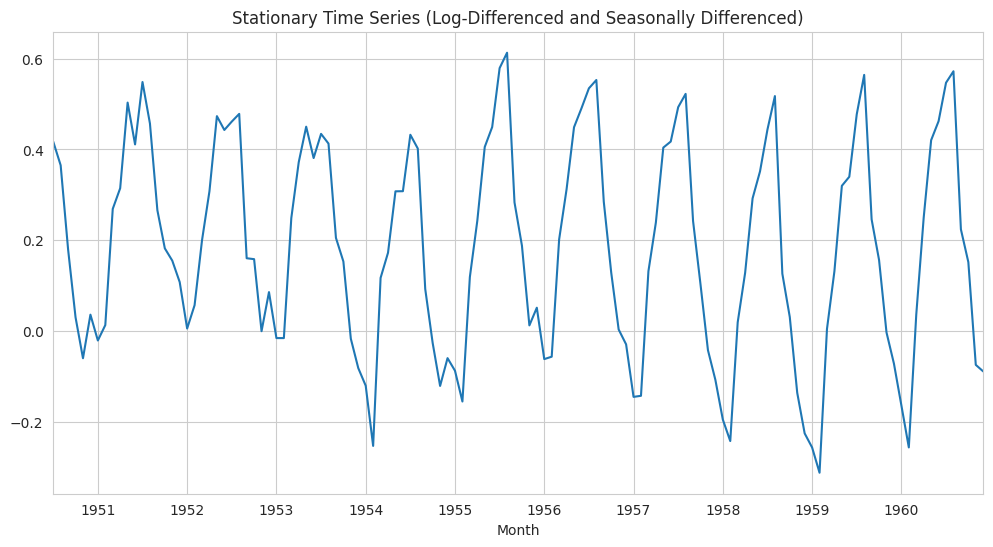

Results of Dickey-Fuller Test:
Test Statistic                  -2.498425
p-value                          0.115858
#Lags Used                      13.000000
Number of Observations Used    112.000000
Critical Value (1%)             -3.490131
Critical Value (5%)             -2.887712
Critical Value (10%)            -2.580730
dtype: float64


In [16]:
# Apply seasonal differencing (period = 18 for monthly data)
df_diff_seasonal = df_log.diff(periods=18).dropna()

# Plot the seasonally differenced series
df_diff_seasonal.plot()
plt.title('Stationary Time Series (Log-Differenced and Seasonally Differenced)')
plt.show()

# Retest for stationarity with the seasonally differenced series
test_stationarity(df_diff_seasonal)

### Step 5: Model Identification with ACF and PACF Plots

Theoretical Concept: ACF and PACF
To choose the parameters for our ARIMA model, we use autocorrelation plots.

Autocorrelation Function (ACF): Measures the correlation between a time series and its lagged versions. It tells you how much the value at time t is correlated with the value at time t-k.


Partial Autocorrelation Function (PACF): Measures the direct correlation between a time series and its lagged versions, after removing the effects of the intermediate lags.
How to read them for ARIMA(p, d, q):

The d term is the number of times we differenced the data (in our case, d=1).

The p (AR term) is suggested by the number of significant lags in the PACF plot.

The q (MA term) is suggested by the number of significant lags in the ACF plot.

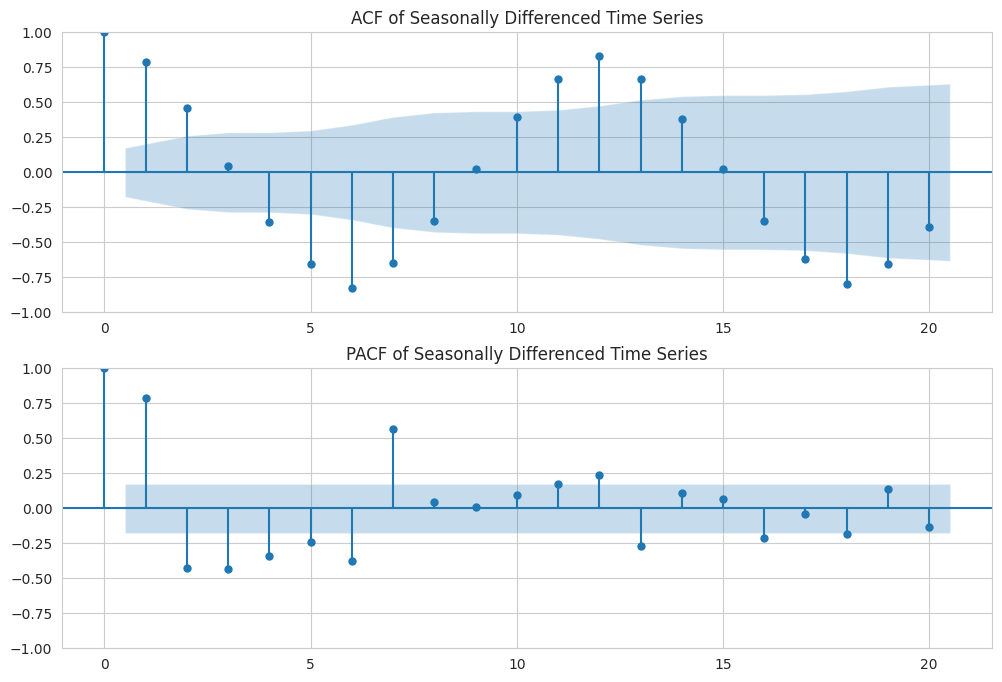

In [18]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,8))
plot_acf(df_diff_seasonal,ax=ax1,lags=20)
plot_pacf(df_diff_seasonal,ax=ax2,lags=20)
ax1.set_title('ACF of Seasonally Differenced Time Series')
ax2.set_title('PACF of Seasonally Differenced Time Series')
plt.show()

# Theoretical Concept:ARIMA


AutoRegressive Integrated Moving Average (ARIMA) models are a class of statistical models for analyzing and forecasting time series data. An ARIMA model is characterized by three parameters:

AR (Autoregressive) - p: The number of lag observations included in the model. This term captures the relationship between the current observation and its past values.
I (Integrated) - d: The number of times that the raw observations are differenced. This is done to make the time series stationary.

MA (Moving Average) - q: The size of the moving average window. This term captures the dependency between an observation and a residual error from a moving average model applied to lagged observations.
The model is typically denoted as ARIMA(p, d, q).

### Step 6: Building the ARIMA Model

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


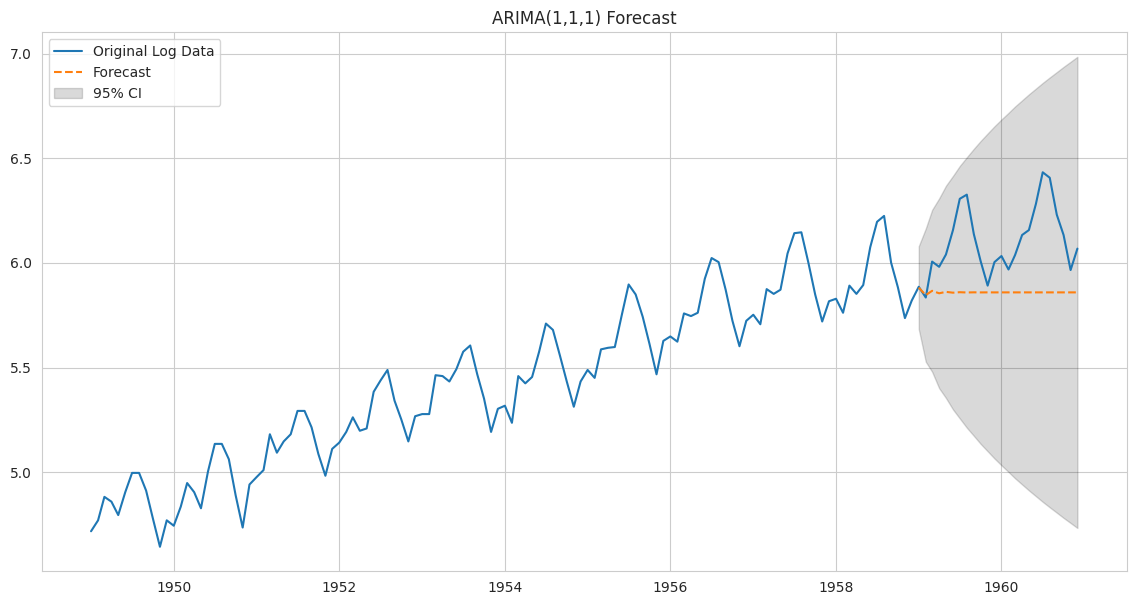

In [31]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# --- split (use .loc to make slicing explicit) ---
train_data = df_log.loc[:'1958']
test_data  = df_log.loc['1959':]

# --- safety check ---
n_steps = len(test_data)
if n_steps == 0:
    raise ValueError("test_data is empty. Check your df_log.index or the slice boundaries ('1959':).")

# --- build & fit ARIMA (kept your order and freq) ---
model = ARIMA(train_data, order=(1, 1, 1), freq='MS')
arima_result = model.fit()

# --- forecast ---
forecast = arima_result.get_forecast(steps=n_steps)
forecast_ci = forecast.conf_int()
forecast_mean = forecast.predicted_mean

# --- align forecast index with test index to avoid plotting/compare misalignment ---
# (get_forecast normally produces an index immediately after the training end,
# but this makes sure it lines up exactly with your test_data index)
forecast_mean = forecast_mean.reindex(test_data.index)
forecast_ci = forecast_ci.reindex(test_data.index)

# --- plot ---
plt.figure(figsize=(14, 7))
plt.plot(df_log, label='Original Log Data')                       # full series
plt.plot(forecast_mean, label='Forecast', linestyle='--')         # forecast mean

# fill_between for confidence interval (lower/upper columns assumed in iloc 0,1)
lower = forecast_ci.iloc[:, 0]
upper = forecast_ci.iloc[:, 1]
plt.fill_between(forecast_ci.index, lower, upper, color='k', alpha=0.15, label='95% CI')

plt.title('ARIMA(1,1,1) Forecast')
plt.legend()
plt.show()


#### **Theoretical Concept: SARIMA**
**Seasonal AutoRegressive Integrated Moving Average (SARIMA)** is an extension of ARIMA that explicitly models the seasonal component.

It is written as **SARIMA(p, d, q)(P, D, Q, m)**, where:
- `(p, d, q)` are the non-seasonal parameters:
    - **p (non-seasonal AR order):** The number of non-seasonal lagged observations included in the model.
    - **d (non-seasonal differencing order):** The number of times the data is differenced to remove non-seasonal trend.
    - **q (non-seasonal MA order):** The number of non-seasonal lagged forecast errors included in the model.

- `(P, D, Q, m)` are the seasonal parameters:
    - **P (seasonal AR order):** The number of seasonal lagged observations included in the model.
    - **D (seasonal differencing order):** The number of times the data is differenced seasonally to remove seasonal trend.
    - **Q (seasonal MA order):** The number of seasonal lagged forecast errors included in the model.
    - **m (number of periods in a season):** The number of time steps for a single seasonal period (e.g., `m=12` for monthly data with an annual seasonality, `m=4` for quarterly data).

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


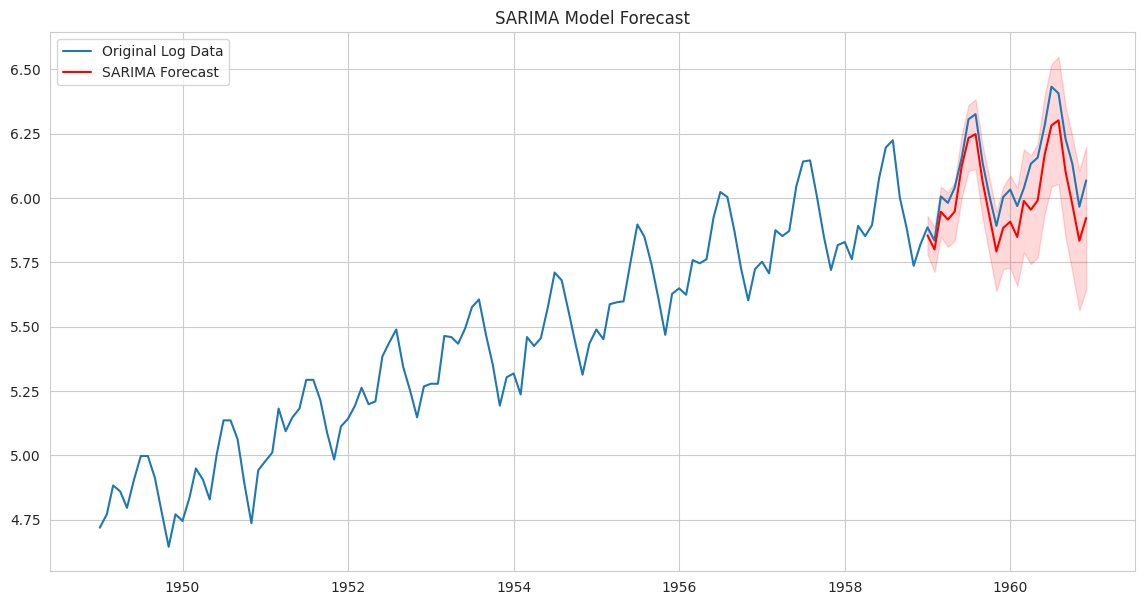

In [35]:
# Build SARIMA model
# We can find the optimal P, D, Q through a grid search, but common values are 1.
sarima_model = sm.tsa.statespace.SARIMAX(train_data,
                                          order=(1, 1, 1),
                                          seasonal_order=(1, 1, 1, 12),
                                          enforce_stationarity=False,
                                          enforce_invertibility=False,
                                          freq='MS') # Explicitly set frequency to suppress warnings
sarima_result = sarima_model.fit()

# Get forecast
sarima_forecast = sarima_result.get_forecast(steps=len(test_data))
sarima_forecast_ci = sarima_forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(df_log, label='Original Log Data')
plt.plot(sarima_forecast.predicted_mean, label='SARIMA Forecast', color='red')
plt.fill_between(sarima_forecast_ci.index, sarima_forecast_ci.iloc[:, 0], sarima_forecast_ci.iloc[:, 1], color='r', alpha=.15)
plt.title('SARIMA Model Forecast')
plt.legend()
plt.show()

step:8 final result evaluation

SARIMA Model RMSE: 48.25


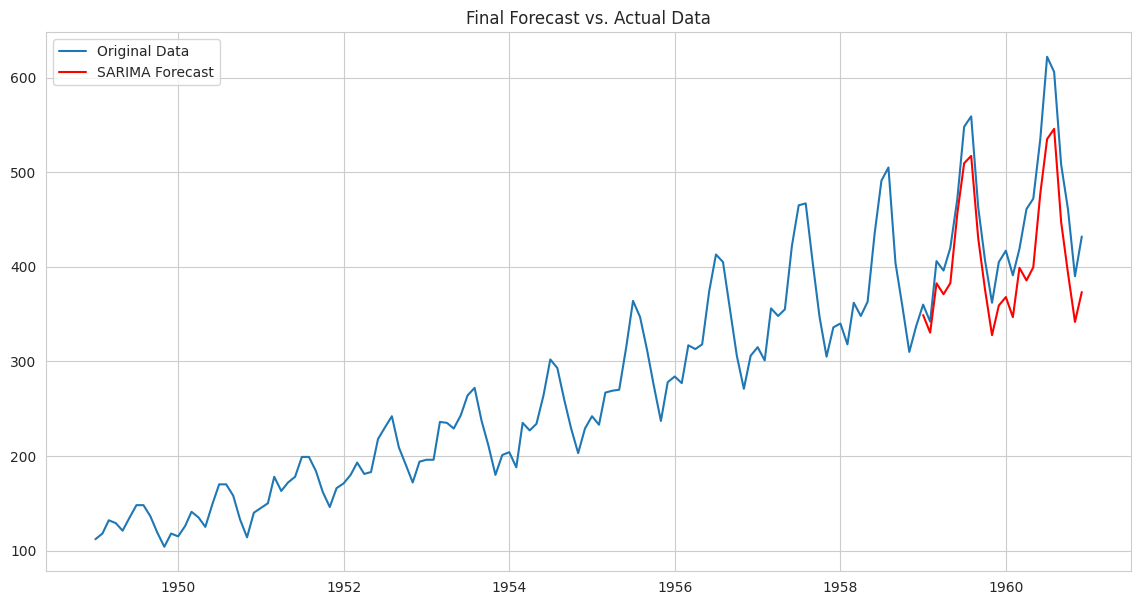

In [37]:
# Reverse the log transformation to get actual passenger numbers
original_test_data = np.exp(test_data)
sarima_predictions = np.exp(sarima_forecast.predicted_mean)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(original_test_data, sarima_predictions))
print(f"SARIMA Model RMSE: {rmse:.2f}")

# Plot final results
plt.figure(figsize=(14, 7))
plt.plot(df['Passengers'], label='Original Data')
plt.plot(sarima_predictions, label='SARIMA Forecast', color='red')
plt.title('Final Forecast vs. Actual Data')
plt.legend()
plt.show()

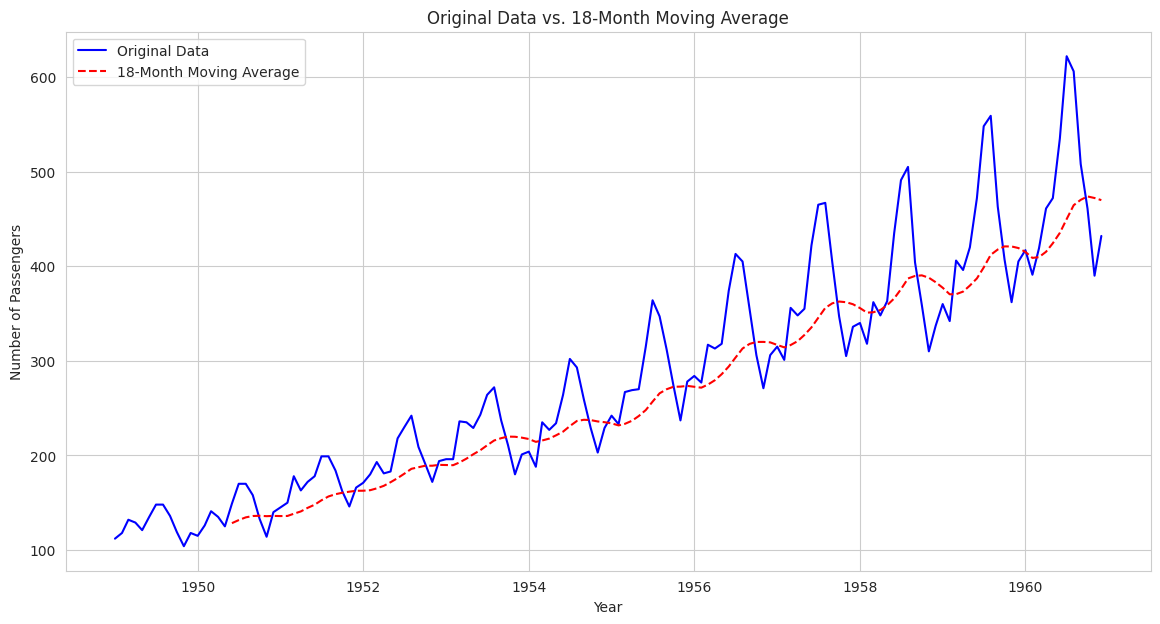

In [39]:
# Calculate the rolling mean with a window size of 18
df['MovingAverage'] = df['Passengers'].rolling(window=18).mean()

# Plot the original data and the moving average
plt.figure(figsize=(14, 7))
plt.plot(df['Passengers'], label='Original Data', color='blue')
plt.plot(df['MovingAverage'], label='18-Month Moving Average', color='red', linestyle='--')
plt.title('Original Data vs. 18-Month Moving Average')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


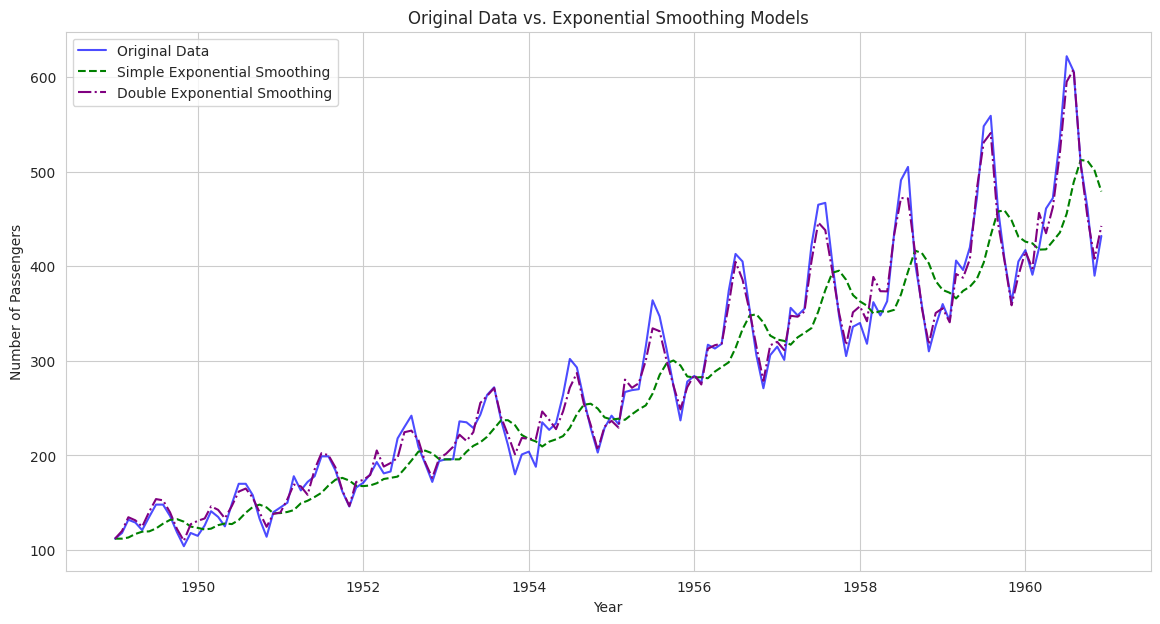

In [40]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# 2. Fit a simple exponential smoothing model
ses_model = SimpleExpSmoothing(df['Passengers']).fit(smoothing_level=0.2, optimized=False)
df['SimpleExpSmoothing'] = ses_model.fittedvalues

# 3. Fit a double exponential smoothing model
des_model = ExponentialSmoothing(df['Passengers'], trend='add', seasonal='add', seasonal_periods=12).fit()
df['DoubleExpSmoothing'] = des_model.fittedvalues

# 4. Plot the original data and the fitted values from both models
plt.figure(figsize=(14, 7))
plt.plot(df['Passengers'], label='Original Data', color='blue', alpha=0.7)
plt.plot(df['SimpleExpSmoothing'], label='Simple Exponential Smoothing', color='green', linestyle='--')
plt.plot(df['DoubleExpSmoothing'], label='Double Exponential Smoothing', color='purple', linestyle='-.')
plt.title('Original Data vs. Exponential Smoothing Models')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


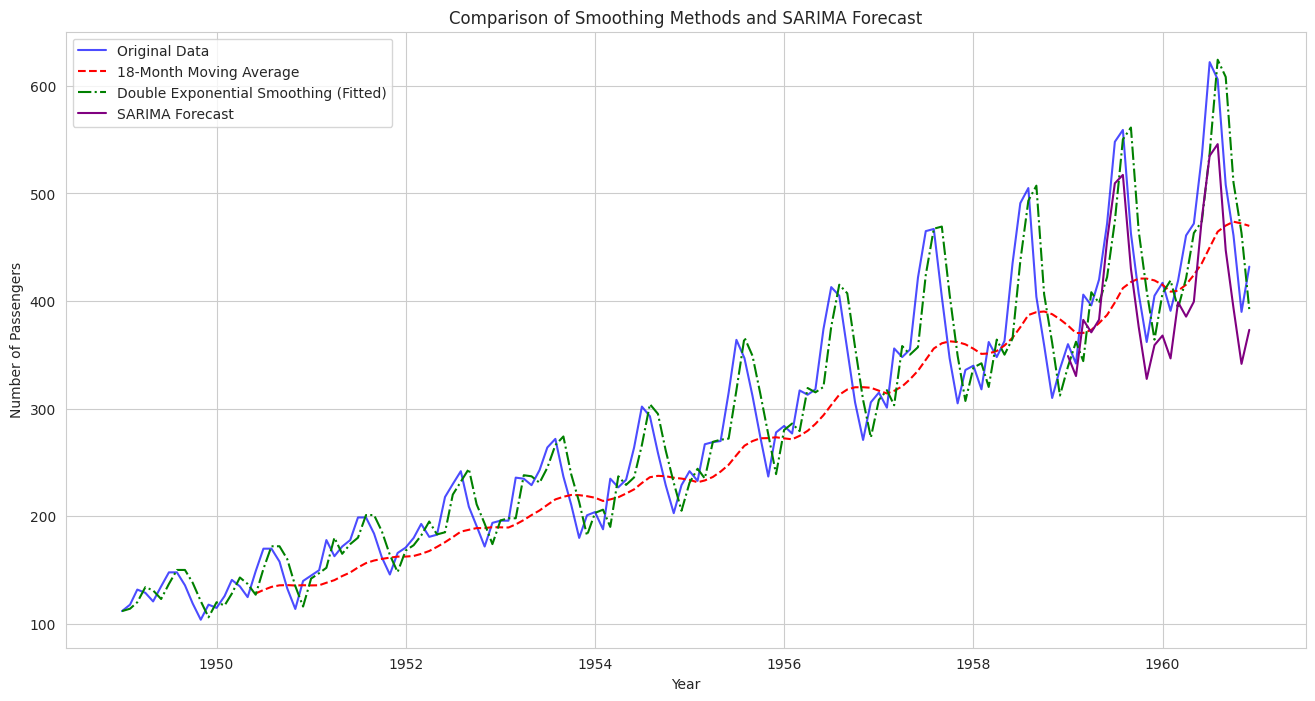

In [42]:
# Implement Double Exponential Smoothing for comparison
# We need to re-fit the DoubleExpSmoothing model as it was not saved as a variable
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Double Exponential Smoothing model on the entire data for visualization
# Assuming an additive trend based on the initial plot
double_exp_smoothing_model = ExponentialSmoothing(df['Passengers'], trend='add', seasonal=None)
double_exp_smoothing_fit = double_exp_smoothing_model.fit()
df['DoubleExpSmoothing'] = double_exp_smoothing_fit.fittedvalues

# Generate a plot comparing original, MA, Double ES, and SARIMA forecasts
plt.figure(figsize=(16, 8))
plt.plot(df['Passengers'], label='Original Data', color='blue', alpha=0.7)
plt.plot(df['MovingAverage'], label='18-Month Moving Average', color='red', linestyle='--')
plt.plot(df['DoubleExpSmoothing'], label='Double Exponential Smoothing (Fitted)', color='green', linestyle='-.')
# Plot SARIMA forecast (need to re-run SARIMA forecast as the variable is not available)
# Re-split data and fit SARIMA model to get forecast
train_data = df_log[:'1958']
test_data = df_log['1959':]
sarima_model = sm.tsa.statespace.SARIMAX(train_data,
                                          order=(1, 1, 1),
                                          seasonal_order=(1, 1, 1, 12),
                                          enforce_stationarity=False,
                                          enforce_invertibility=False,
                                          freq='MS')
sarima_result = sarima_model.fit()
sarima_forecast = sarima_result.get_forecast(steps=len(test_data))
sarima_predictions_plot = np.exp(sarima_forecast.predicted_mean)


plt.plot(sarima_predictions_plot, label='SARIMA Forecast', color='purple')

plt.title('Comparison of Smoothing Methods and SARIMA Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()

**Visual comparison summary**

Certainly! I will update the code to plot the ACF and PACF for the seasonally differenced series (df_diff_seasonal).

The ACF and PACF plots for the seasonally differenced series are now displayed above. These plots help in identifying the appropriate parameters (p, q) for the ARIMA part of the model.

Based on these plots, the next steps would typically involve:

Model Identification: Determine the likely values for p and q based on the significant lags in the PACF and ACF plots, respectively.
Model Building: Build an ARIMA or SARIMA model using the stationary series (df_diff_seasonal) and the identified parameters, including the seasonal parameters (P, Q, S) based on the seasonal patterns observed in the original data and the ACF/PACF plots.
Model Evaluation: Evaluate the performance of the built model using metrics like Mean Squared Error (MSE) and by examining the residuals.
Forecasting: Use the trained model to forecast future passenger numbers.
Inverting Transformations: Convert the forecasted values back to the original scale by inverting the log transformation and differencing.
Would you like me to proceed with identifying potential model parameters and building the SARIMA model?


visual comparison summary
Based on the plot comparing the original data with the Moving Average, Double Exponential Smoothing, and SARIMA forecasts.

Original Data: Shows a clear upward trend and strong seasonality.
18-Month Moving Average: Smooths out the seasonal fluctuations and shows the overall trend, but it lags significantly behind the actual data and doesn't capture the peaks and troughs of the seasonality.
Double Exponential Smoothing (Fitted): This model seems to capture the trend reasonably well, but it does not account for seasonality, as expected from a non-seasonal exponential smoothing method.
SARIMA Forecast: The SARIMA model, which explicitly accounts for seasonality, appears to follow the seasonal pattern of the original data much more closely than the other methods, especially in the forecast period (starting from 1959). It captures both the trend and the seasonal fluctuations, suggesting it is a more appropriate model for this dataset compared to the simple moving average or double exponential smoothing without seasonality.
